In [3]:
import numpy as np
import pandas as pd
import datetime

In [4]:
load = pd.read_csv('F:\Python Prac\sales_data_sample.csv', usecols=['ORDERNUMBER','SALES','ORDERDATE',\
'YEAR_ID','PRODUCTCODE','CITY','COUNTRY'])
load.head(5)
load.shape

(2823, 7)

In [5]:
tune1 = load["YEAR_ID"].isin([2003,2004]) 
tune2 = load["PRODUCTCODE"].isin(['S18_3232','S50_1392','S32_2509','S12_1666','S10_1949'])
tuned_load = load[tune1 & tune2]
print(tuned_load.shape)
tuned_load.head(5)

(135, 7)


,ORDERNUMBER,SALES,ORDERDATE,YEAR_ID,PRODUCTCODE,CITY,COUNTRY
26,10103,5404.62,1/29/2003 0:00,2003,S10_1949,Stavern,Norway
27,10112,7209.11,3/24/2003 0:00,2003,S10_1949,Lule,Sweden
28,10126,7329.06,5/28/2003 0:00,2003,S10_1949,Madrid,Spain
29,10140,7374.10,7/24/2003 0:00,2003,S10_1949,Burlingame,USA
30,10150,10993.50,9/19/2003 0:00,2003,S10_1949,Singapore,Singapore


In [6]:
print(np.unique(tuned_load.PRODUCTCODE).size)
#print(tune_load.count)
print(tuned_load['PRODUCTCODE'].value_counts())

5
S18_3232    43
S10_1949    23
S50_1392    23
S12_1666    23
S32_2509    23
Name: PRODUCTCODE, dtype: int64


In [7]:
tuned_load['ORDERDATE'] = tuned_load['ORDERDATE'].astype('datetime64[ns]')
new_dates = tuned_load.apply(lambda x: x['ORDERDATE'] + pd.DateOffset(years=16), axis=1)
tuned_load['ORDERDATE'] = new_dates
tuned_load['YEAR_ID'] = tuned_load['YEAR_ID'] + 16

<ipython-input-7-0c916de731a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuned_load['ORDERDATE'] = tuned_load['ORDERDATE'].astype('datetime64[ns]')
<ipython-input-7-0c916de731a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuned_load['ORDERDATE'] = new_dates
<ipython-input-7-0c916de731a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [8]:
print(tuned_load.shape)
tuned_load.head(5)

(135, 7)


,ORDERNUMBER,SALES,ORDERDATE,YEAR_ID,PRODUCTCODE,CITY,COUNTRY
26,10103,5404.62,2019-01-29,2019,S10_1949,Stavern,Norway
27,10112,7209.11,2019-03-24,2019,S10_1949,Lule,Sweden
28,10126,7329.06,2019-05-28,2019,S10_1949,Madrid,Spain
29,10140,7374.10,2019-07-24,2019,S10_1949,Burlingame,USA
30,10150,10993.50,2019-09-19,2019,S10_1949,Singapore,Singapore


In [9]:
tuned_load = tuned_load.append(tuned_load)

In [10]:
print(tuned_load.shape)
tuned_load.head(5)

(270, 7)


,ORDERNUMBER,SALES,ORDERDATE,YEAR_ID,PRODUCTCODE,CITY,COUNTRY
26,10103,5404.62,2019-01-29,2019,S10_1949,Stavern,Norway
27,10112,7209.11,2019-03-24,2019,S10_1949,Lule,Sweden
28,10126,7329.06,2019-05-28,2019,S10_1949,Madrid,Spain
29,10140,7374.10,2019-07-24,2019,S10_1949,Burlingame,USA
30,10150,10993.50,2019-09-19,2019,S10_1949,Singapore,Singapore


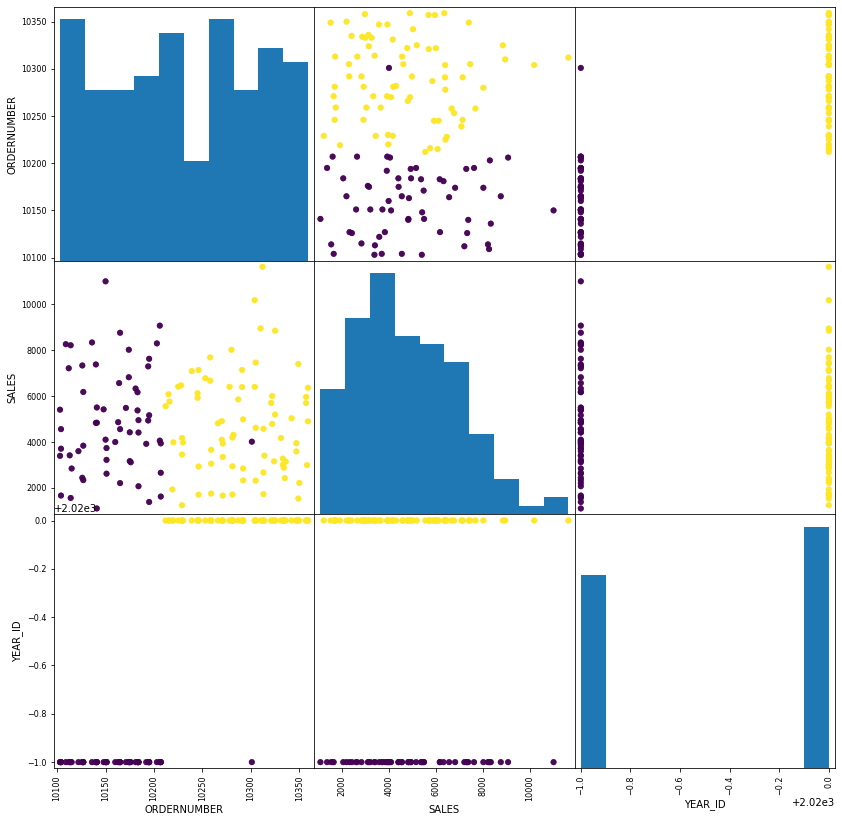

In [11]:
pd.plotting.scatter_matrix(tuned_load,alpha=.8, c=tuned_load['YEAR_ID'], marker='o',figsize=(14,14));

In [12]:
tuned_load['day'] = tuned_load['ORDERDATE'].dt.date
tuned_load['month'] = tuned_load['ORDERDATE'].dt.month
tuned_load['year'] = tuned_load['ORDERDATE'].dt.year

In [13]:
tuned_load.sort_values(['day','month','year'])
tuned_load.set_index(['ORDERDATE'],inplace=True)
tuned_load.head(5)

,ORDERNUMBER,SALES,YEAR_ID,PRODUCTCODE,CITY,COUNTRY,day,month,year
ORDERDATE,,,,,,,,,
2019-01-29,10103,5404.62,2019,S10_1949,Stavern,Norway,2019-01-29,1,2019
2019-03-24,10112,7209.11,2019,S10_1949,Lule,Sweden,2019-03-24,3,2019
2019-05-28,10126,7329.06,2019,S10_1949,Madrid,Spain,2019-05-28,5,2019
2019-07-24,10140,7374.10,2019,S10_1949,Burlingame,USA,2019-07-24,7,2019
2019-09-19,10150,10993.50,2019,S10_1949,Singapore,Singapore,2019-09-19,9,2019


In [14]:
monthly = tuned_load.SALES.resample('M').sum()
quarterly = tuned_load.SALES.resample('Q').sum()
yearly = tuned_load.SALES.resample('Y').sum()

In [18]:
monthly

ORDERDATE
2019-01-31     37457.06
2019-02-28         0.00
2019-03-31     37763.10
2019-04-30     25227.58
2019-05-31     26734.26
2019-06-30     24702.82
2019-07-31     41071.02
2019-08-31     22881.40
2019-09-30     60168.88
2019-10-31     69899.46
2019-11-30    181228.10
2019-12-31     59257.84
2020-01-31     23259.40
2020-02-29     36163.96
2020-03-31     38612.44
2020-04-30     14166.74
2020-05-31     47612.68
2020-06-30     59175.88
2020-07-31     45506.44
2020-08-31     66839.84
2020-09-30     47357.00
2020-10-31    127790.24
2020-11-30    130254.54
2020-12-31     74089.90
Freq: M, Name: SALES, dtype: float64

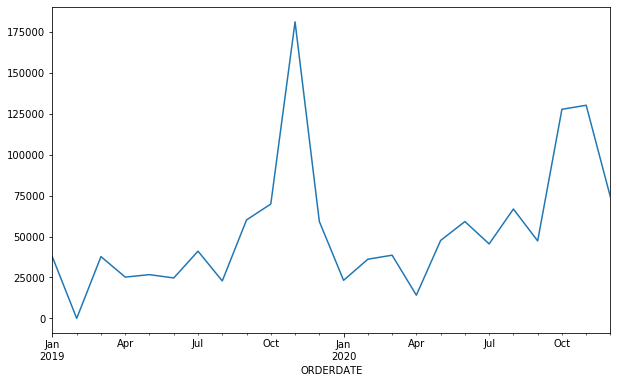

In [21]:
monthly.plot(figsize=(10,6))

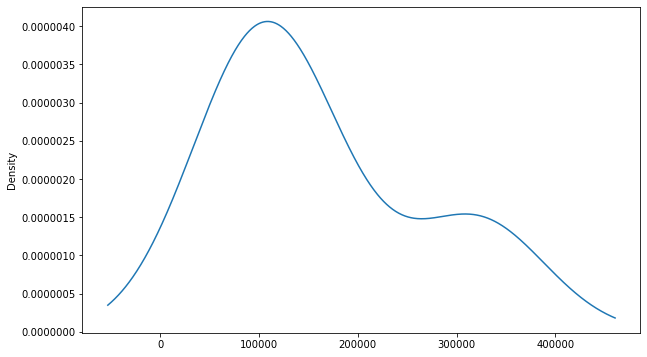

In [16]:
quarterly.plot(figsize=(10,6),kind='kde')

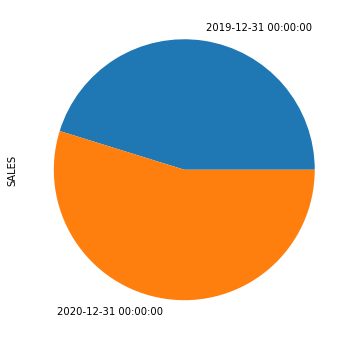

In [17]:
yearly.plot(figsize=(10,6),kind='pie')